In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
rtl_data = pd.read_csv('OnlineRetail.csv', encoding='latin1')

In [3]:
rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
rtl_data.shape

(541909, 8)

In [5]:
len(rtl_data['InvoiceNo'].unique())

25900

In [6]:
country_cust_data = rtl_data[['Country','CustomerID']].drop_duplicates()
country_cust_data

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0
...,...,...
536969,United Kingdom,13436.0
537255,United Kingdom,15520.0
538064,United Kingdom,13298.0
538812,United Kingdom,14569.0


In [7]:
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index()

,Country,CustomerID
0,Australia,9
1,Austria,11
2,Bahrain,2
3,Belgium,25
4,Brazil,1
5,Canada,4
6,Channel Islands,9
7,Cyprus,8
8,Czech Republic,1
9,Denmark,9


In [8]:
rtl_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
rtl_data= rtl_data[rtl_data['CustomerID'].notnull()]

In [10]:
rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
rtl_data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
rtl_data[rtl_data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [13]:
rtl_data = rtl_data[rtl_data['Quantity']>0]

In [14]:
rtl_data['Quantity']=abs(rtl_data['Quantity'])

In [15]:
rtl_data.InvoiceDate=pd.to_datetime(rtl_data['InvoiceDate'])

In [16]:
rtl_data['TotalAmount']=rtl_data.Quantity * rtl_data.UnitPrice

In [17]:
rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [18]:
rtl_data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [19]:
#Recency : days since last purchase
Latest_date=dt.datetime(2011,12,10)
RFMscores = rtl_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (Latest_date - x.max()).days,  # Recency: Latest date - last purchase date
    'InvoiceNo': 'count',  # Frequency: Count of invoices
    'TotalAmount': 'sum'   # Monetary: Sum of total amount spent
})

In [20]:
RFMscores

,InvoiceDate,InvoiceNo,TotalAmount
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [21]:
RFMscores.InvoiceDate=RFMscores.InvoiceDate.astype(int)

In [22]:
RFMscores.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo':'Frequency',
                         'TotalAmount': 'Monetary'},inplace=True)

In [23]:
RFMscores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [24]:
RFMscores.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

<Axes: xlabel='Recency', ylabel='Density'>

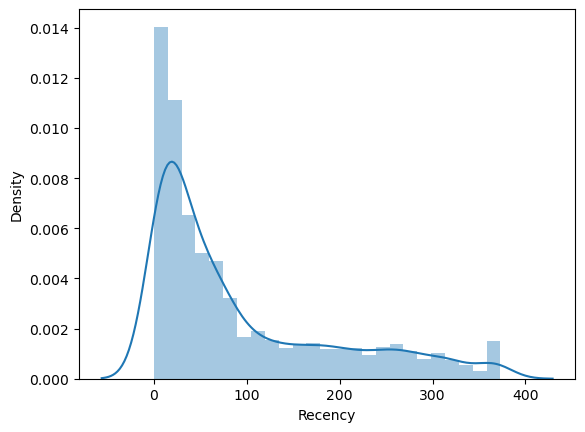

In [25]:
sns.distplot(RFMscores.Recency)

<Axes: xlabel='Frequency', ylabel='Count'>

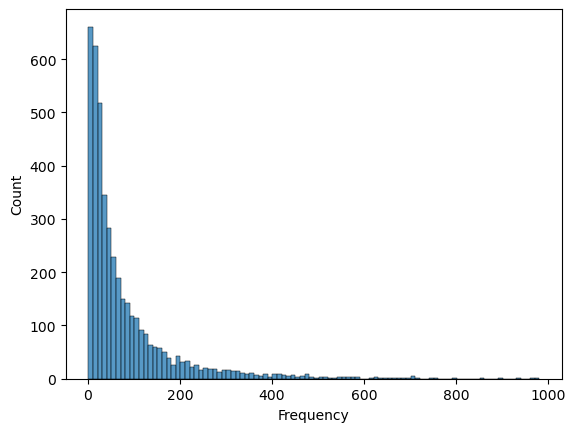

In [26]:
sns.histplot(RFMscores[RFMscores.Frequency<1000].Frequency)

<Axes: xlabel='Monetary', ylabel='Count'>

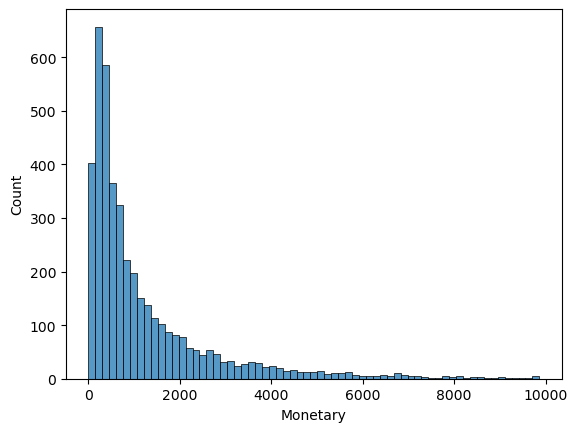

In [27]:
sns.histplot(RFMscores[RFMscores['Monetary']<10000].Monetary)

## All The Graphs Are Right Skewed

In [28]:
quantiles = RFMscores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.245, 0.5: 674.45, 0.75: 1661.64}}

In [29]:
def RScoring(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<= d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1
    
def FnMScoring(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<= d[p][0.50]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4
    
    

In [30]:
RFMscores['R']=RFMscores['Recency'].apply(RScoring,args=('Recency',quantiles))
RFMscores['F']=RFMscores['Frequency'].apply(FnMScoring,args=('Frequency',quantiles))
RFMscores['M']=RFMscores['Monetary'].apply(FnMScoring,args=('Monetary',quantiles))

In [31]:
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,18,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [32]:
RFMscores['RFMgroup']=RFMscores.R*100+RFMscores.F*10+RFMscores.M
RFMscores['RFMscore']=RFMscores.R+RFMscores.F+RFMscores.M

In [33]:
RFMscores.describe()

,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMscore
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,92.041484,91.708689,2053.793018,2.506107,2.490897,2.499885,278.019590,7.496889
std,100.007757,228.792852,8988.248381,1.122159,1.122139,1.118266,118.413054,2.814485
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,111.000000,3.000000
25%,17.000000,17.000000,307.245000,1.500000,1.000000,1.500000,177.500000,5.000000
50%,50.000000,41.000000,674.450000,3.000000,2.000000,2.000000,311.000000,7.000000
75%,141.500000,100.000000,1661.640000,4.000000,3.000000,3.500000,411.000000,10.000000
max,373.000000,7847.000000,280206.020000,4.000000,4.000000,4.000000,444.000000,12.000000


In [34]:
RFMscores[RFMscores['RFMgroup']==444].sort_values('Monetary',ascending=False).reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMscore
0,14646.0,1,2080,280206.02,4,4,4,444,12
1,18102.0,0,431,259657.30,4,4,4,444,12
2,17450.0,8,337,194550.79,4,4,4,444,12
3,14911.0,1,5677,143825.06,4,4,4,444,12
4,14156.0,9,1400,117379.63,4,4,4,444,12
...,...,...,...,...,...,...,...,...,...
435,17813.0,14,371,1770.88,4,4,4,444,12
436,13184.0,14,181,1701.29,4,4,4,444,12
437,16775.0,10,158,1695.66,4,4,4,444,12
438,16813.0,8,449,1692.98,4,4,4,444,12


In [35]:
#to apply log transform
RFMscores[['Recency','Frequency','Monetary']]=RFMscores[['Recency','Frequency','Monetary']]+1
Log_Tfd_data =pd.DataFrame(np.log(RFMscores[['Recency','Frequency','Monetary']]))

In [36]:
Log_Tfd_data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.786897,0.693147,11.253955
12347.0,1.098612,5.209486,8.368925
12348.0,4.330733,3.465736,7.494564
12349.0,2.944439,4.304065,7.472245
12350.0,5.739793,2.890372,5.815324
...,...,...,...
18280.0,5.627621,2.397895,5.201806
18281.0,5.198497,2.079442,4.404522
18282.0,2.079442,2.564949,5.187665


<Axes: xlabel='Frequency', ylabel='Density'>

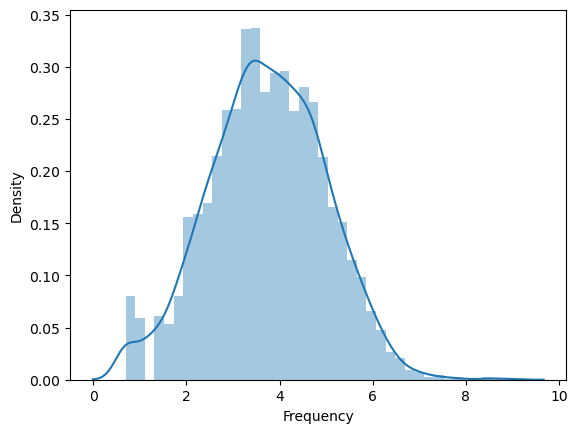

In [37]:
sns.distplot(Log_Tfd_data.Frequency)

<Axes: xlabel='Monetary', ylabel='Density'>

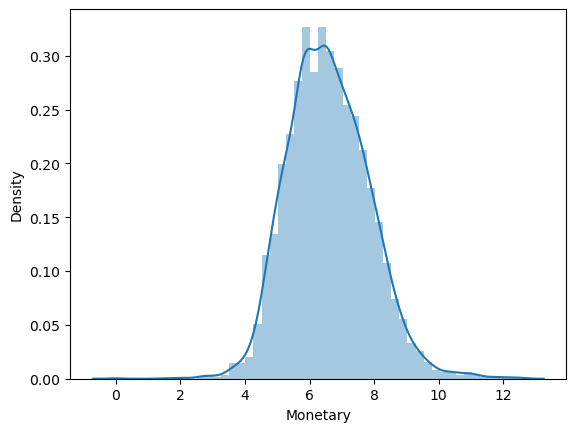

In [38]:
sns.distplot(Log_Tfd_data.Monetary)

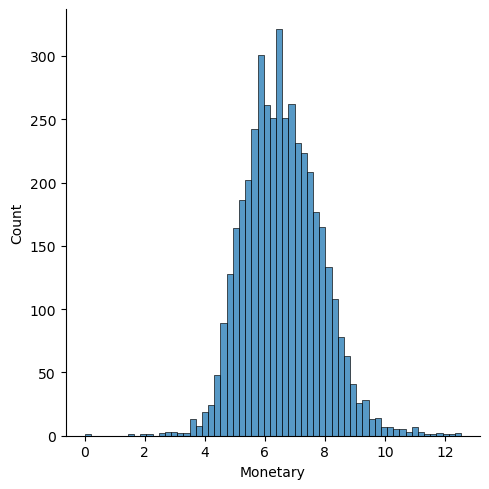

In [39]:
sns.displot(Log_Tfd_data.Monetary)

In [40]:
scale=StandardScaler()
Scaled_Data=scale.fit_transform(Log_Tfd_data)
Scaled_Data=pd.DataFrame(Scaled_Data,index=RFMscores.index,columns=Log_Tfd_data.columns)

In [41]:
Scaled_Data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.435661,-2.432827,3.696168
12347.0,-1.953295,1.177369,1.408758
12348.0,0.383063,-0.216521,0.715517
12349.0,-0.619028,0.453609,0.697821
12350.0,1.401611,-0.676446,-0.615877
...,...,...,...
18280.0,1.320527,-1.070114,-1.102307
18281.0,1.010332,-1.324674,-1.734438
18282.0,-1.244297,-0.936577,-1.113519


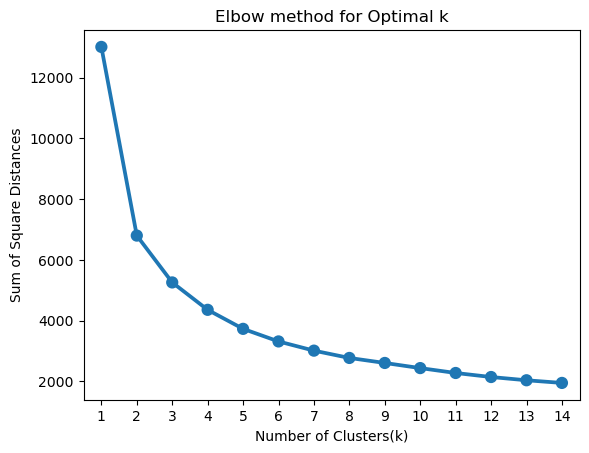

In [42]:
sum_of_sq_dist={}
for k in range(1,15):
    km=KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km.fit(Scaled_Data)
    sum_of_sq_dist[k]=km.inertia_
    
#graph for sum of squared distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y=list((sum_of_sq_dist.values())))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow method for Optimal k')
plt.show()

In [58]:
KMean_clust = KMeans(n_clusters=4, init='k-means++', max_iter=1000, random_state=103)
KMean_clust.fit(Scaled_Data)

RFMscores['Cluster'] = KMean_clust.labels_
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMscore,Cluster,Color
CustomerID,,,,,,,,,,
12346.0,326,2,77184.60,1,1,4,114,6,1,Blue
12347.0,3,183,4311.00,4,4,4,444,12,0,Yellow
12348.0,76,32,1798.24,2,2,4,224,8,1,Blue
12349.0,19,74,1758.55,3,3,4,334,10,1,Blue
12350.0,311,18,335.40,1,1,2,112,4,2,Green


In [59]:
RFMscores['Cluster'].value_counts()

Cluster
2    1383
1    1238
0     864
3     854
Name: count, dtype: int64

<Figure size 700x700 with 0 Axes>

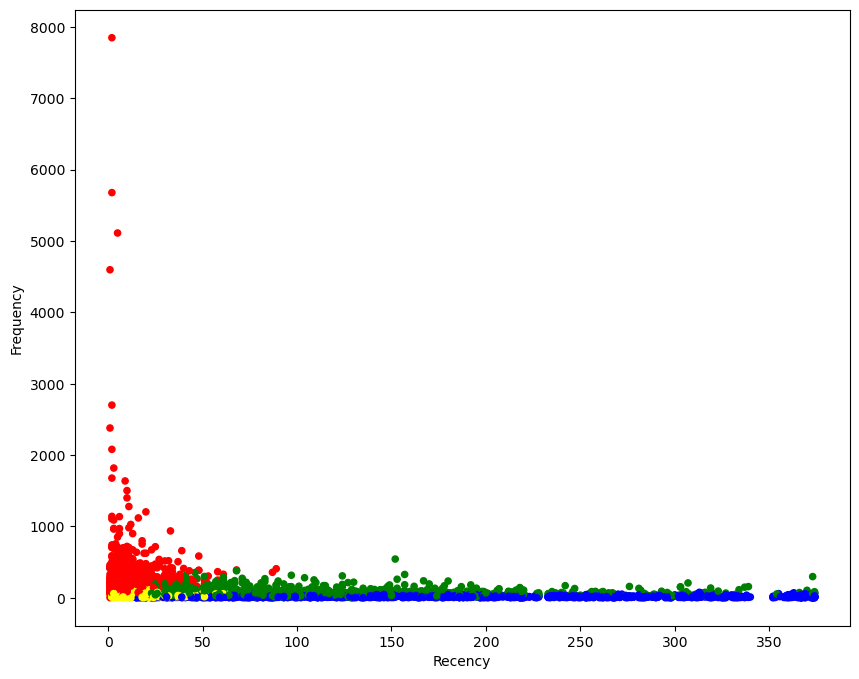

In [60]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

#Frequency vs Recency Graph
Colors=['Red','Green','Blue','Yellow']
RFMscores['Color']=RFMscores['Cluster'].map(lambda p: Colors[p])
ax=RFMscores.plot(kind='scatter',x='Recency',y='Frequency',figsize=(10,8),c=RFMscores['Color'])

Text(0.5, 0, 'Monetary')

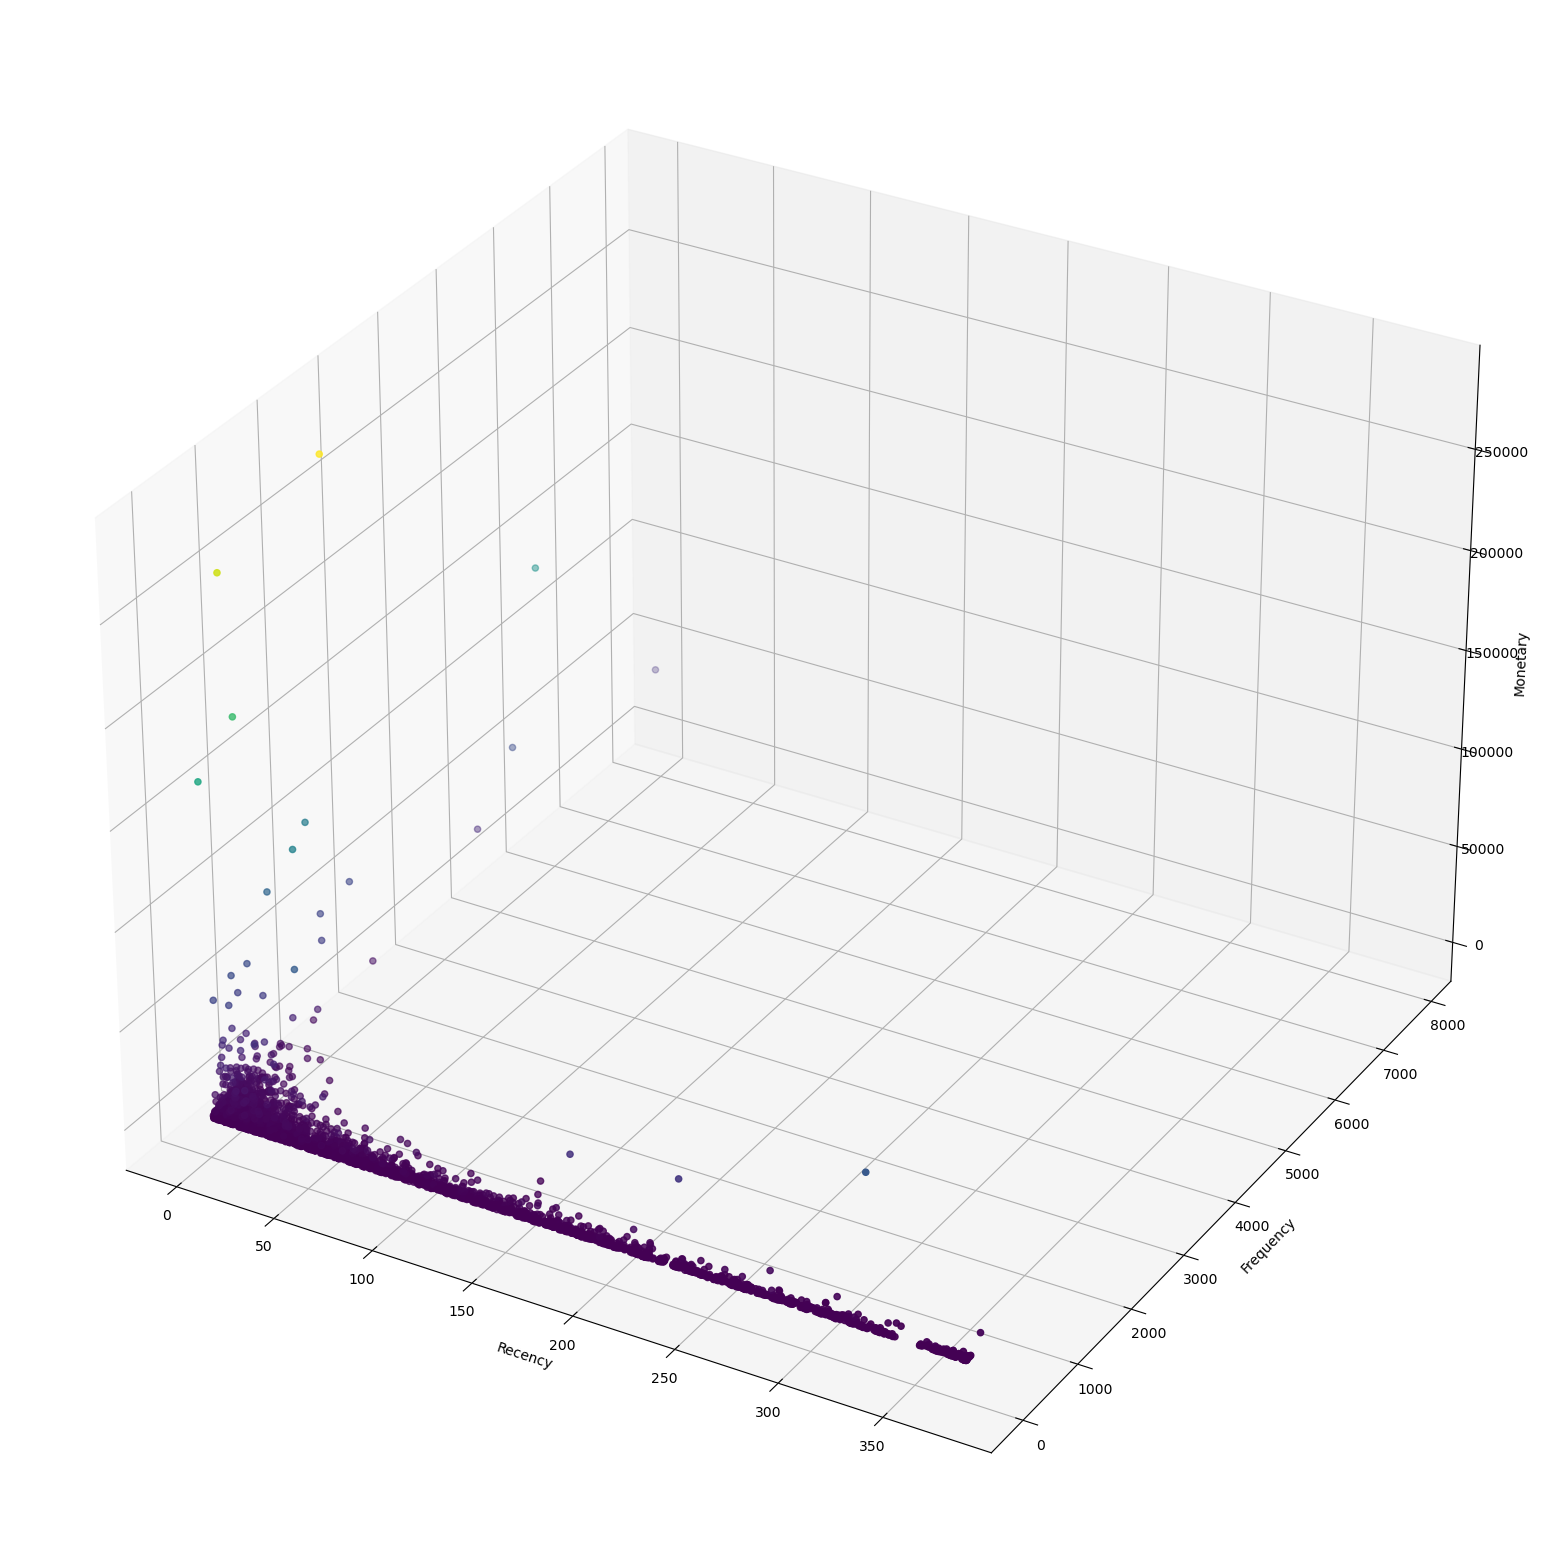

In [65]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(xs=RFMscores.Recency, ys=RFMscores.Frequency, zs= RFMscores.Monetary, c=RFMscores.Monetary)

ax1.set_xlabel('Recency')
ax1.set_ylabel('Frequency')
ax1.set_zlabel('Monetary')

In [66]:
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMscore,Cluster,Color
CustomerID,,,,,,,,,,
12346.0,326,2,77184.60,1,1,4,114,6,1,Green
12347.0,3,183,4311.00,4,4,4,444,12,0,Red
12348.0,76,32,1798.24,2,2,4,224,8,1,Green
12349.0,19,74,1758.55,3,3,4,334,10,1,Green
12350.0,311,18,335.40,1,1,2,112,4,2,Blue


In [68]:
print(KMean_clust.labels_)

[1 0 1 ... 3 0 1]


In [69]:
RFMscores[RFMscores['Color']=='Blue']['RFMgroup'].max()

412

In [70]:
RFMscores[RFMscores['Color']=='Blue']['RFMgroup'].min()

111

In [71]:
RFMscores[RFMscores['Color']=='Yellow']['RFMgroup'].min()

213

In [73]:
RFMscores[RFMscores['Color']=='Green']['RFMgroup'].min()

113

<Axes: xlabel='Cluster', ylabel='Recency'>

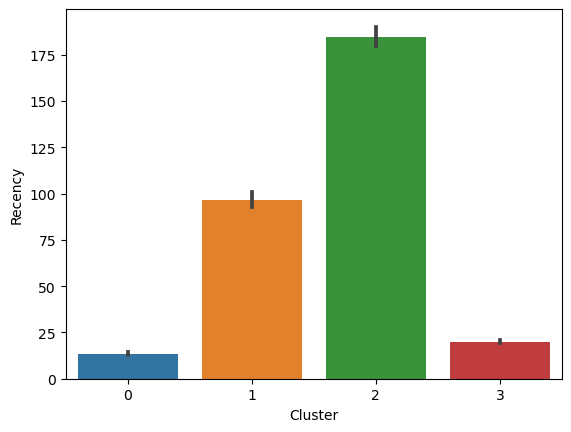

In [75]:
sns.barplot(x=RFMscores.Cluster, y= RFMscores.Recency)

<Axes: xlabel='Cluster', ylabel='Frequency'>

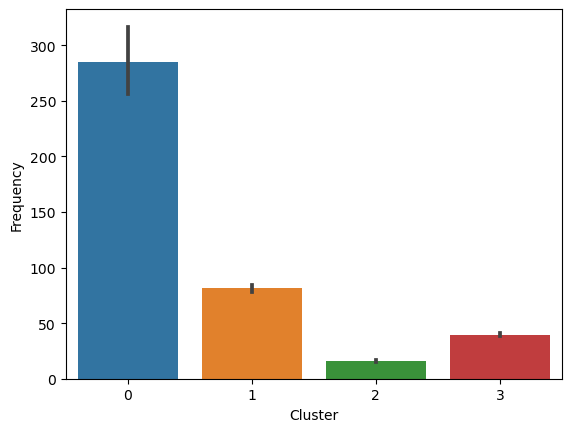

In [76]:
sns.barplot(x=RFMscores.Cluster, y= RFMscores.Frequency)

<Axes: xlabel='Cluster', ylabel='Monetary'>

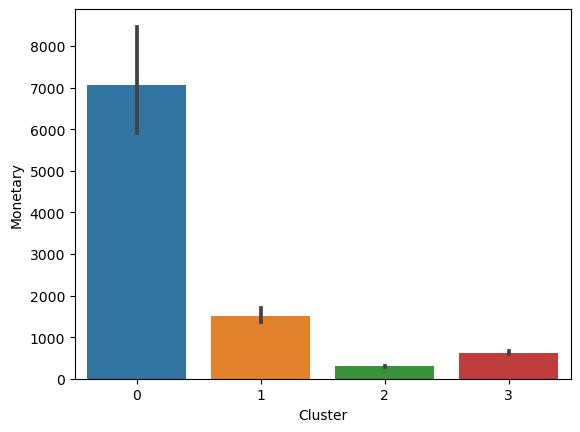

In [77]:
sns.barplot(x=RFMscores.Cluster, y= RFMscores.Monetary)

In [78]:
RFMscores[RFMscores.Cluster==0]['RFMgroup'].value_counts()

RFMgroup
444    440
344    181
434     83
443     75
433     37
334     13
343     13
244      9
424      7
442      4
414      2
Name: count, dtype: int64

In [79]:
RFMscores[RFMscores.Cluster==1]['RFMgroup'].value_counts()

RFMgroup
233    169
333    127
244     94
223     90
133     71
343     70
222     70
232     54
234     52
334     46
132     45
344     41
243     40
123     30
122     26
342     24
144     21
143     21
323     17
332     17
224     16
242     14
134     14
214      9
131      8
324      8
231      8
213      6
322      5
114      5
124      5
142      4
434      2
113      2
314      2
443      2
424      1
433      1
313      1
Name: count, dtype: int64

In [80]:
RFMscores[RFMscores.Cluster==2]['RFMgroup'].value_counts()

RFMgroup
111    384
211    181
122    180
112    105
121    100
222     84
311     84
212     76
221     51
131     28
113     22
213     21
312     20
321     11
231      8
411      6
123      6
114      5
214      5
132      3
313      2
412      1
Name: count, dtype: int64

In [81]:
RFMscores[RFMscores.Cluster==3]['RFMgroup'].value_counts()

RFMgroup
322    121
433    110
422     74
411     60
332     54
321     44
423     43
432     43
333     41
311     39
323     30
331     25
421     25
412     21
312     15
431     13
413     13
442     12
313     12
222     11
424     11
443     10
231      6
314      5
414      4
324      3
441      3
342      2
213      1
434      1
221      1
223      1
Name: count, dtype: int64

In [83]:
RFMscores['CustomerType']=RFMscores['Cluster']

In [84]:
RFMscores['CustomerType'].replace({0:'New Customers', 1:'Best Customers', 2:'At Risk Customers', 3: 'Gone Customers'})

CustomerID
12346.0       Best Customers
12347.0        New Customers
12348.0       Best Customers
12349.0       Best Customers
12350.0    At Risk Customers
                 ...        
18280.0    At Risk Customers
18281.0    At Risk Customers
18282.0       Gone Customers
18283.0        New Customers
18287.0       Best Customers
Name: CustomerType, Length: 4339, dtype: object

In [85]:
RFMscores.head(20)

,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMscore,Cluster,Color,CustomerType
CustomerID,,,,,,,,,,,
12346.0,326,2,77184.60,1,1,4,114,6,1,Green,1
12347.0,3,183,4311.00,4,4,4,444,12,0,Red,0
12348.0,76,32,1798.24,2,2,4,224,8,1,Green,1
12349.0,19,74,1758.55,3,3,4,334,10,1,Green,1
12350.0,311,18,335.40,1,1,2,112,4,2,Blue,2
12352.0,37,86,2507.04,3,3,4,334,10,1,Green,1
12353.0,205,5,90.00,1,1,1,111,3,2,Blue,2
12354.0,233,59,1080.40,1,3,3,133,7,1,Green,1
12355.0,215,14,460.40,1,1,2,112,4,2,Blue,2


In [87]:
RFMscores.to_excel('RFMAnalysis.xlsx', index=False)
from IPython.display import FileLink
FileLink('RFMAnalysis.xlsx') 

C:\Users\range\RFMAnalysis.xlsx